# 环境配置

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
# Matplotlib中设置字体-黑体，解决Matplotlib中文乱码问题
plt.rcParams['font.sans-serif'] = ['SimHei']  
# 解决Matplotlib坐标轴负号'-'显示为方块的问题
plt.rcParams['axes.unicode_minus'] = False

# 读取数据

In [3]:
path = 'merged_excel.xlsx'
data = pd.read_excel(path)
data.columns

Index(['文物采样点', '文物编号', '二氧化硅(SiO2)', '氧化钠(Na2O)', '氧化钾(K2O)', '氧化钙(CaO)',
       '氧化镁(MgO)', '氧化铝(Al2O3)', '氧化铁(Fe2O3)', '氧化铜(CuO)', '氧化铅(PbO)',
       '氧化钡(BaO)', '五氧化二磷(P2O5)', '氧化锶(SrO)', '氧化锡(SnO2)', '二氧化硫(SO2)',
       '成分比例累加和', '表面风化', '类型'],
      dtype='object')

In [4]:
data.head()
# ['无风化' '风化'], ['铅钡' '高钾']

,文物采样点,文物编号,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2),成分比例累加和,表面风化,类型
0,01,1,69.33,0.0,9.99,6.32,0.87,3.93,1.74,3.87,0.00,0.00,1.17,0.00,0.0,0.39,97.61,0,1
1,02,2,36.28,0.0,1.05,2.34,1.18,5.73,1.86,0.26,47.43,0.00,3.57,0.19,0.0,0.00,99.89,1,0
2,03部位1,3,87.05,0.0,5.19,2.01,0.00,4.06,0.00,0.78,0.25,0.00,0.66,0.00,0.0,0.00,100.00,0,1
3,03部位2,3,61.71,0.0,12.37,5.87,1.11,5.50,2.16,5.09,1.41,2.86,0.70,0.10,0.0,0.00,98.88,0,1
4,04,4,65.88,0.0,9.67,7.12,1.56,6.44,2.06,2.18,0.00,0.00,0.79,0.00,0.0,0.36,96.06,0,1


# 提取数据

In [5]:
# 提取铅钡无风化00，铅钡有风化01，高钾无风化10，高钾有风化11
bariumLead_non = data[(data['类型'] == 0) & (data['表面风化'] == 0)]
bariumLead = data[(data['类型'] == 0) & (data['表面风化'] == 1)]
highK_non = data[(data['类型'] == 1) & (data['表面风化'] == 0)]
highK = data[(data['类型'] == 1) & (data['表面风化'] == 1) ]

# 绘制各个子类别的肘部法则图

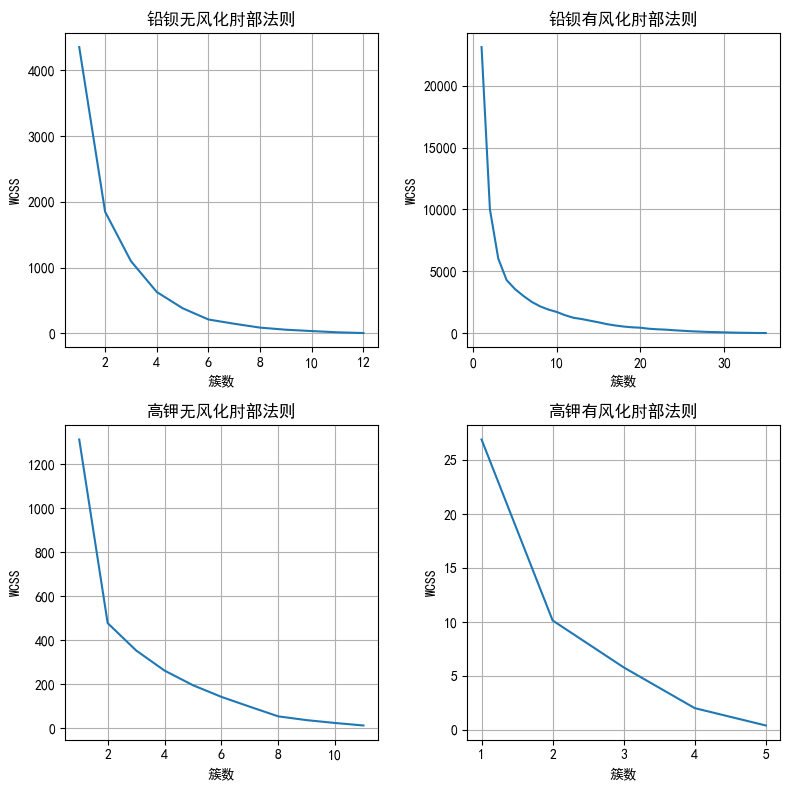

In [6]:
data_lst = [bariumLead_non, bariumLead, highK_non, highK]
data_name_lst = ['铅钡无风化', '铅钡有风化', '高钾无风化', '高钾有风化']
feature_lst = ['二氧化硅(SiO2)', '氧化钠(Na2O)', '氧化钾(K2O)', '氧化钙(CaO)',  
              '氧化镁(MgO)', '氧化铝(Al2O3)', '氧化铁(Fe2O3)', '氧化铜(CuO)', '氧化铅(PbO)',  
              '氧化钡(BaO)', '五氧化二磷(P2O5)', '氧化锶(SrO)', '氧化锡(SnO2)', '二氧化硫(SO2)']  
fig = plt.figure(figsize=(8, 8))  # 可以设置图形的大小    
for index, data in enumerate(data_lst):  
    X = data[feature_lst]  
    n = X.shape[0]  
  
    # 使用肘部法则来确定最佳的簇数  
    wcss = []  
    for i in range(1, n):  
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)  
        kmeans.fit(X)  
        wcss.append(kmeans.inertia_)  
  
    ax = fig.add_subplot(2, 2, index+1)  
    ax.plot(range(1, n), wcss)  
    ax.set_title(f'{data_name_lst[index]}肘部法则')  
    ax.set_xlabel('簇数')  
    ax.set_ylabel('WCSS')  
    ax.grid(True)  
  
# 将 plt.show() 移动到循环外部  
plt.tight_layout()  # 调整子图之间的间距  
plt.show()


# 美化作图

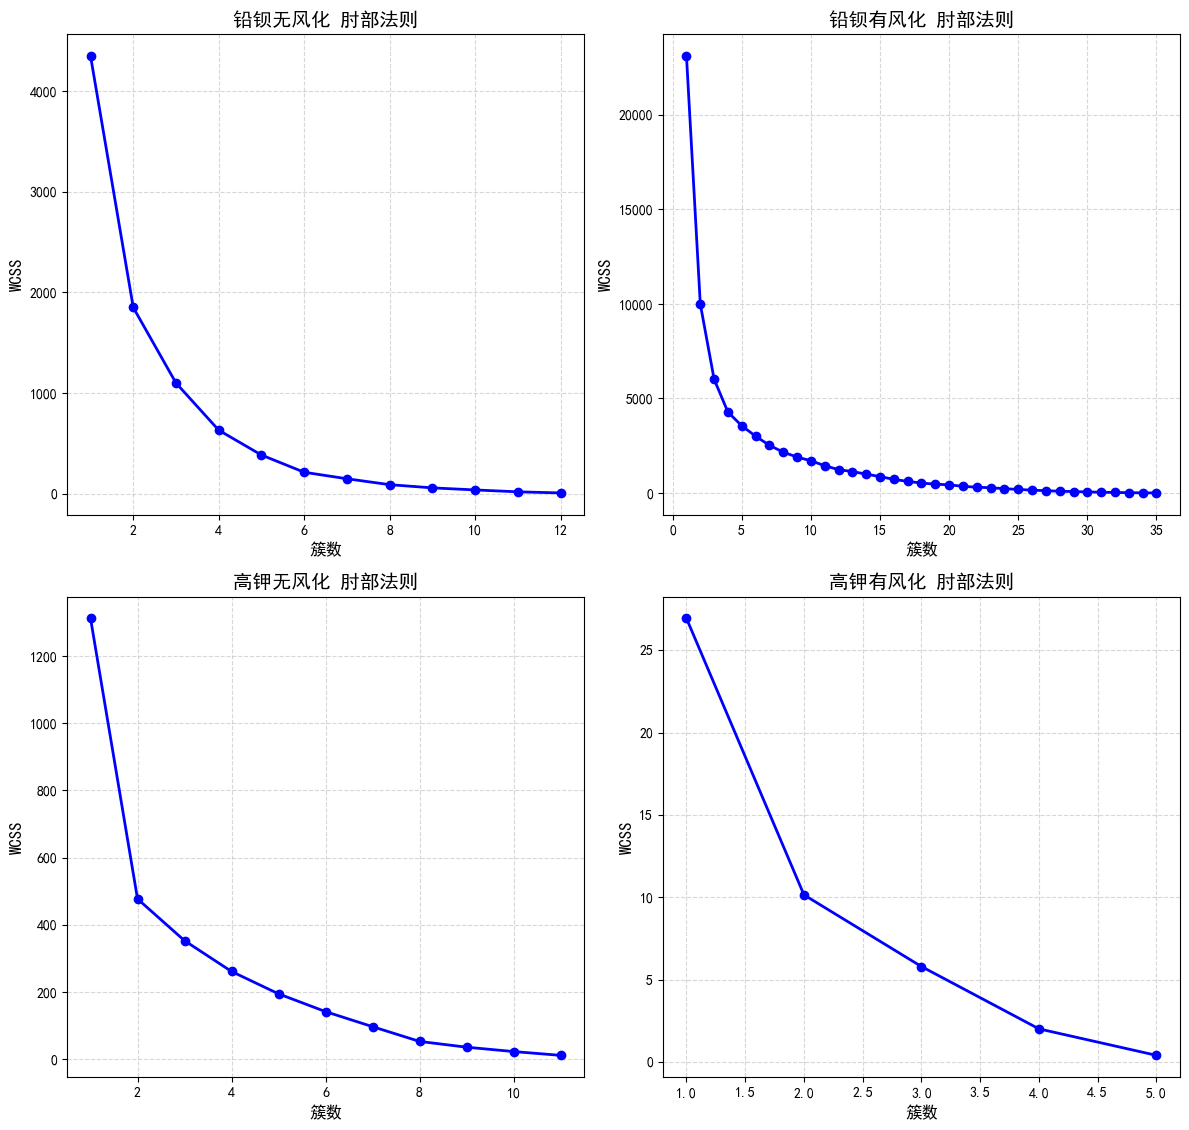

In [7]:
data_lst = [bariumLead_non, bariumLead, highK_non, highK]  
data_name_lst = ['铅钡无风化', '铅钡有风化', '高钾无风化', '高钾有风化']  
feature_lst = ['二氧化硅(SiO2)', '氧化钠(Na2O)', '氧化钾(K2O)', '氧化钙(CaO)',  
              '氧化镁(MgO)', '氧化铝(Al2O3)', '氧化铁(Fe2O3)', '氧化铜(CuO)', '氧化铅(PbO)',  
              '氧化钡(BaO)', '五氧化二磷(P2O5)', '氧化锶(SrO)', '氧化锡(SnO2)', '二氧化硫(SO2)']  
# 创建一个新的图形，并设置大小  
fig, axes = plt.subplots(2, 2, figsize=(12, 12))  
  
# 遍历数据和对应的子图  
for index, (data, ax) in enumerate(zip(data_lst, axes.flat)):  
    X = data[feature_lst]  
    n = X.shape[0]  
  
    # 肘部法则  
    wcss = []  
    for i in range(1, n):  
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)  
        kmeans.fit(X)  
        wcss.append(kmeans.inertia_)  
  
    # 绘制图形  
    ax.plot(range(1, n), wcss, marker='o', linestyle='-', color='b', linewidth=2)  
  
    # 美化图形  
    ax.set_title(f'{data_name_lst[index]} 肘部法则', fontsize=14, fontweight='bold')  
    ax.set_xlabel('簇数', fontsize=12)  
    ax.set_ylabel('WCSS', fontsize=12)  
    ax.grid(True, linestyle='--', alpha=0.5)  
    ax.tick_params(axis='both', which='major', labelsize=10)  
  
# 调整子图之间的间距  
plt.tight_layout(rect=[0, 0, 1, 0.95]) 
  
# 显示图形  
plt.show()

# 以最佳分类簇数进行k_mean聚类

In [8]:
best_k = [2, 5, 2, 2]
data_lst = [bariumLead_non, bariumLead, highK_non, highK]
data_name_lst = ['铅钡无风化', '铅钡有风化', '高钾无风化', '高钾有风化']
feature_lst = ['二氧化硅(SiO2)', '氧化钠(Na2O)', '氧化钾(K2O)', '氧化钙(CaO)',  
              '氧化镁(MgO)', '氧化铝(Al2O3)', '氧化铁(Fe2O3)', '氧化铜(CuO)', '氧化铅(PbO)',  
              '氧化钡(BaO)', '五氧化二磷(P2O5)', '氧化锶(SrO)', '氧化锡(SnO2)', '二氧化硫(SO2)']
cluster_stats = {}
# {'铅钡无风化':{'簇0':df1,'簇1':df2},'铅钡有风化':{},}
for index,data in enumerate(data_lst):
    kmeans = KMeans(n_clusters=best_k[index], init='k-means++', max_iter=300, n_init=10, random_state=0)
    X = data[feature_lst]
    data[f'{data_name_lst[index]}亚类分类结果'] = kmeans.fit_predict(X)
    cluster_stats[data_name_lst[index]] = {}  
    for i in range(best_k[index]):
        claster_data = data[data[f'{data_name_lst[index]}亚类分类结果'] == i]
        claster_stat = claster_data[feature_lst].describe()
        cluster_stats[data_name_lst[index]][f'簇{i}'] = claster_stat  

# 提取每个亚类的簇心mean

In [9]:
mean_df = pd.DataFrame()  
for kind, subkind_data in cluster_stats.items():  
    for subkind, df in subkind_data.items():  
        mean_row = df.loc['mean']  
        mean_df[f'{kind}_{subkind}'] = mean_row 

In [10]:
mean_df.head(20)

,铅钡无风化_簇0,铅钡无风化_簇1,铅钡有风化_簇0,铅钡有风化_簇1,铅钡有风化_簇2,铅钡有风化_簇3,铅钡有风化_簇4,高钾无风化_簇0,高钾无风化_簇1,高钾有风化_簇0,高钾有风化_簇1
二氧化硅(SiO2),63.14875,37.916,51.103333,28.668667,12.0650,19.351667,61.822,63.624444,81.063333,95.360000,92.566667
氧化钠(Na2O),0.91500,0.542,3.608333,0.321333,0.0000,0.000000,1.564,0.926667,0.000000,0.000000,0.000000
氧化钾(K2O),0.15500,0.424,0.133333,0.162000,0.1000,0.053333,0.238,10.817778,4.870000,0.840000,0.246667
氧化钙(CaO),0.71000,2.066,1.186667,2.773333,2.2800,2.756667,2.012,6.363333,2.240000,0.516667,1.223333
氧化镁(MgO),0.61375,0.298,0.783333,0.708667,0.0000,0.788333,1.034,1.133333,0.916667,0.000000,0.393333
氧化铝(Al2O3),3.10375,3.340,3.861667,3.048667,1.0825,2.251667,10.288,7.348889,4.433333,1.196667,2.663333
氧化铁(Fe2O3),0.72000,1.274,0.470000,0.853333,0.0000,0.228333,0.604,2.312222,0.790000,0.290000,0.240000
氧化铜(CuO),0.76750,2.820,1.775000,1.486667,6.9300,1.525000,0.408,2.818889,1.353333,1.346667,1.776667
氧化铅(PbO),19.80000,29.664,24.085000,42.234667,30.1450,59.391667,14.486,0.410000,0.416667,0.000000,0.000000
氧化钡(BaO),7.26500,15.674,8.378333,9.459333,32.3875,4.706667,5.518,0.578889,0.656667,0.000000,0.000000


In [11]:
for col in mean_df.columns:  
    print(mean_df[col].sort_values(ascending=False))

二氧化硅(SiO2)     63.14875
氧化铅(PbO)       19.80000
氧化钡(BaO)        7.26500
氧化铝(Al2O3)      3.10375
氧化钠(Na2O)       0.91500
氧化铜(CuO)        0.76750
氧化铁(Fe2O3)      0.72000
氧化钙(CaO)        0.71000
氧化镁(MgO)        0.61375
五氧化二磷(P2O5)     0.51250
二氧化硫(SO2)       0.45750
氧化锶(SrO)        0.26500
氧化钾(K2O)        0.15500
氧化锡(SnO2)       0.00000
Name: 铅钡无风化_簇0, dtype: float64
二氧化硅(SiO2)     37.916
氧化铅(PbO)       29.664
氧化钡(BaO)       15.674
氧化铝(Al2O3)      3.340
氧化铜(CuO)        2.820
氧化钙(CaO)        2.066
五氧化二磷(P2O5)     1.530
氧化铁(Fe2O3)      1.274
氧化钠(Na2O)       0.542
氧化钾(K2O)        0.424
氧化锶(SrO)        0.348
氧化镁(MgO)        0.298
氧化锡(SnO2)       0.168
二氧化硫(SO2)       0.000
Name: 铅钡无风化_簇1, dtype: float64
二氧化硅(SiO2)     51.103333
氧化铅(PbO)       24.085000
氧化钡(BaO)        8.378333
氧化铝(Al2O3)      3.861667
氧化钠(Na2O)       3.608333
五氧化二磷(P2O5)     1.821667
氧化铜(CuO)        1.775000
氧化钙(CaO)        1.186667
氧化镁(MgO)        0.783333
氧化铁(Fe2O3)      0.470000
氧化锶(SrO)        0.235000
氧化钾(K2O)        0.1

In [12]:
columns = ['文物采样点', '文物编号', '二氧化硅(SiO2)', '氧化钠(Na2O)', '氧化钾(K2O)', '氧化钙(CaO)',
       '氧化镁(MgO)', '氧化铝(Al2O3)', '氧化铁(Fe2O3)', '氧化铜(CuO)', '氧化铅(PbO)',
       '氧化钡(BaO)', '五氧化二磷(P2O5)', '氧化锶(SrO)', '氧化锡(SnO2)', '二氧化硫(SO2)',
       '成分比例累加和', '表面风化', '类型', '铅钡无风化亚类分类结果','铅钡有风化亚类分类结果','高钾无风化亚类分类结果','高钾有风化亚类分类结果']
index = range(len(bariumLead_non) + len(bariumLead) + len(highK_non) + len(highK))
merge_data = pd.DataFrame(index=index, columns=columns)

In [13]:
start_idx = 0  
for df, cls_group in [(bariumLead_non, '铅钡无风化亚类分类结果'), (bariumLead, '铅钡有风化亚类分类结果'), (highK_non, '高钾无风化亚类分类结果'),(highK,'高钾有风化亚类分类结果')]:  
    end_idx = start_idx + len(df)  
    merge_data.iloc[start_idx:end_idx, :19] = df[['文物采样点', '文物编号', '二氧化硅(SiO2)', '氧化钠(Na2O)', '氧化钾(K2O)', '氧化钙(CaO)',
       '氧化镁(MgO)', '氧化铝(Al2O3)', '氧化铁(Fe2O3)', '氧化铜(CuO)', '氧化铅(PbO)',
       '氧化钡(BaO)', '五氧化二磷(P2O5)', '氧化锶(SrO)', '氧化锡(SnO2)', '二氧化硫(SO2)',
       '成分比例累加和', '表面风化', '类型']]
    merge_data.iloc[start_idx:end_idx, columns.index(cls_group)] = df[cls_group]
    start_idx = end_idx

In [14]:
merge_data.head()

,文物采样点,文物编号,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),...,氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2),成分比例累加和,表面风化,类型,铅钡无风化亚类分类结果,铅钡有风化亚类分类结果,高钾无风化亚类分类结果,高钾有风化亚类分类结果
0,20,20,37.36,0.0,0.71,0.0,0.0,5.45,1.51,4.78,...,0.0,0.0,0.0,88.41,0,0,1,NaN,NaN,NaN
1,24,24,31.94,0.0,0.0,0.47,0.0,1.59,0.0,8.46,...,0.91,0.0,0.0,98.88,0,0,1,NaN,NaN,NaN
2,30部位1,30,34.34,0.0,1.41,4.49,0.98,4.35,2.12,0.0,...,0.35,0.4,0.0,97.95,0,0,1,NaN,NaN,NaN
3,30部位2,30,36.93,0.0,0.0,4.24,0.51,3.86,2.74,0.0,...,0.48,0.44,0.0,98.7,0,0,1,NaN,NaN,NaN
4,31,31,65.91,0.0,0.0,1.6,0.89,3.11,4.59,0.44,...,0.3,0.0,0.0,98.43,0,0,0,NaN,NaN,NaN


In [15]:
merge_data.to_excel('excel2_subkind_result.xlsx',index=False)